In [61]:
serie2 = '../data/submissions/serie2.csv'
SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/serie5.csv',
    'best_1dcnn': '../data/submissions/submission_405.csv',
    'best_gnn': '../data/submissions/best_gnn.csv',
}

# SUBMISSIONS = {
#     '435': '../data/submissions/submission_435.csv',
#     '430': '../data/submissions/submission_430.csv',
#     '405': '../data/submissions/submission_405.csv',
#     'best_1dcnn': '../data/submissions/best_1dcnn.csv',
# }

# Unknown
SUBMISSIONS = {
    'morning-sweep': '../data/submissions/u_090_morning_sweep_409.csv',
    'ensemble': '../data/submissions/u_125_submission_443.csv',
    'pseudo' : '../data/submissions/u_bbstrat.csv',
    'xgb': '../data/submissions/u_xgb_344.csv',
}

SUBMISSIONS = {
    'morning-sweep': '../data/submissions/submission_409_morning_sweep.csv',
    'divine-sweep': '../data/submissions/divine_sweep_20.csv',
    'xgb': '../data/submissions/xgb_398.csv',
    'their_xgb': '../data/submissions/serie5.csv',
    'own_ensemble': '../data/submissions/own_ensemble.csv',
    'best_submission': '../data/submissions/submission_443.csv',
}



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Load test parquet
test_data = pd.read_parquet('../data/raw/test.parquet')

In [64]:
test_data = test_data.drop(columns=['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles'])

In [65]:
# Add submissions
for submission_name, submission_path in SUBMISSIONS.items():
    submission = pd.read_csv(submission_path)
    test_data[submission_name + '_binds'] = submission['binds']

In [66]:
test_data

,id,protein_name,morning-sweep_binds,divine-sweep_binds,xgb_binds,their_xgb_binds,own_ensemble_binds,best_submission_binds
0,295246830,BRD4,9.163079e-04,4.897884e-05,0.000247,0.381680,0.076762,0.151291
1,295246831,HSA,1.806560e-03,3.117563e-04,0.000668,0.341728,0.069264,0.111352
2,295246832,sEH,1.365105e-06,1.468465e-07,0.000067,0.179440,0.035902,0.070111
3,295246833,BRD4,5.590133e-04,2.522992e-05,0.000099,0.400709,0.080390,0.151305
4,295246834,HSA,1.509562e-03,4.264078e-04,0.000443,0.380798,0.076937,0.135084
...,...,...,...,...,...,...,...,...
1674891,296921721,HSA,2.083325e-05,3.304025e-05,0.000064,0.015900,0.003208,0.004118
1674892,296921722,sEH,4.616727e-05,6.555725e-06,0.000154,0.010117,0.002074,0.001658
1674893,296921723,BRD4,2.544840e-06,3.632419e-06,0.000023,0.006538,0.001314,0.000593
1674894,296921724,HSA,7.054859e-05,4.865831e-05,0.000508,0.022120,0.004564,0.004207


,morning-sweep_binds,divine-sweep_binds,xgb_binds,their_xgb_binds,own_ensemble_binds,best_submission_binds
morning-sweep_binds,1.000000,0.856936,0.922943,0.331515,0.805786,0.625658
divine-sweep_binds,0.856936,1.000000,0.834195,0.302487,0.754241,0.587746
xgb_binds,0.922943,0.834195,1.000000,0.315835,0.780387,0.592460
their_xgb_binds,0.331515,0.302487,0.315835,1.000000,0.814728,0.912136
own_ensemble_binds,0.805786,0.754241,0.780387,0.814728,1.000000,0.945200
best_submission_binds,0.625658,0.587746,0.592460,0.912136,0.945200,1.000000


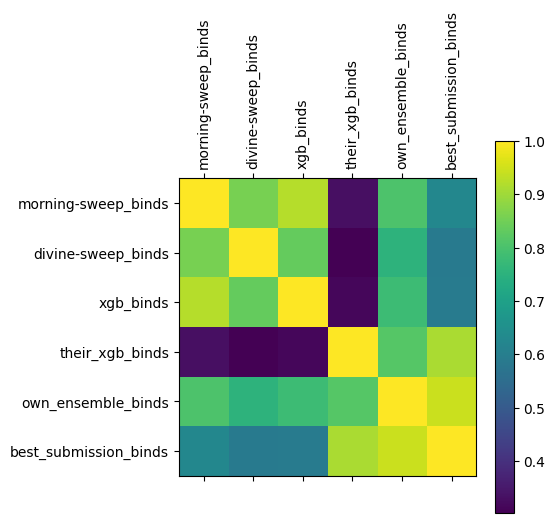

In [67]:
# Calculate similarity between submissions
submissions = test_data[[name + '_binds' for name in SUBMISSIONS.keys()]]
display(submissions.corr())
# Draw correlation matrix with labels
plt.matshow(submissions.corr())
plt.xticks(range(submissions.shape[1]), submissions.columns, fontsize=10, rotation=90)
plt.yticks(range(submissions.shape[1]), submissions.columns, fontsize=10)
plt.colorbar()
plt.show()

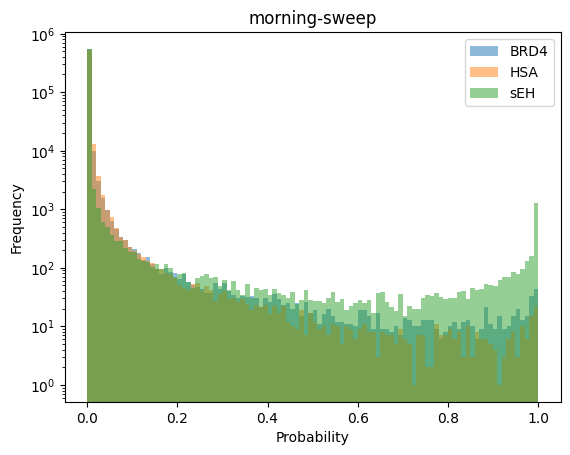

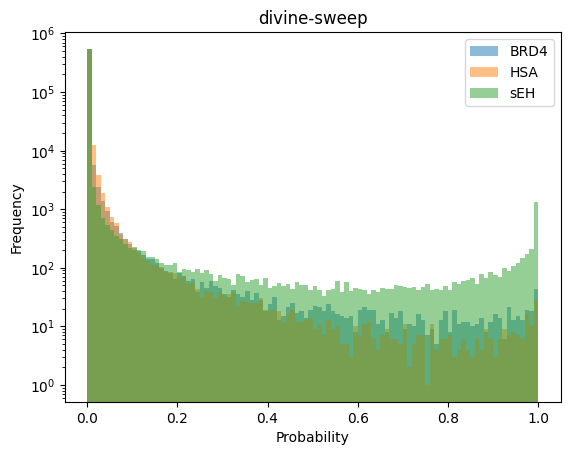

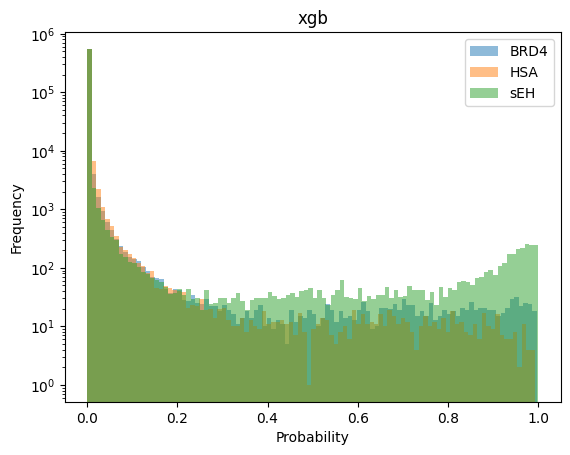

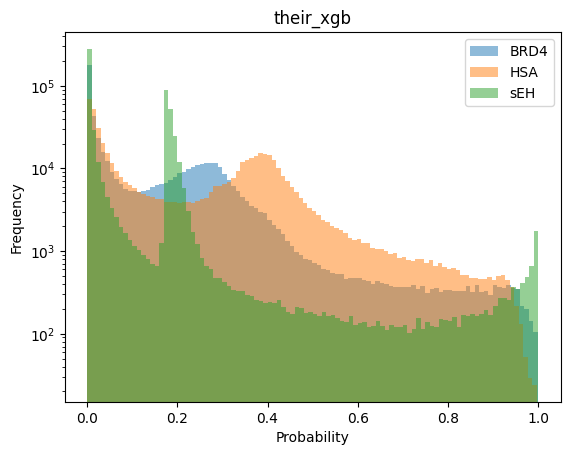

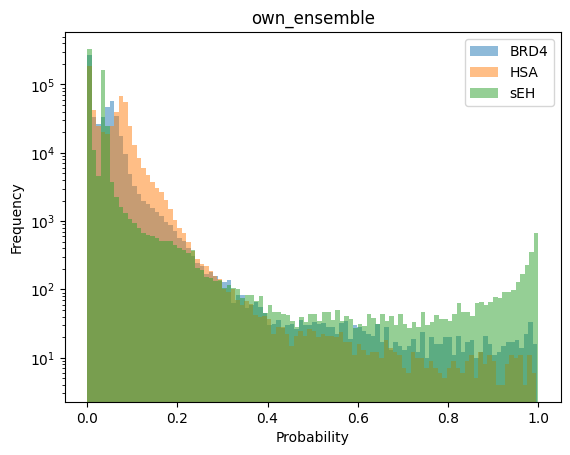

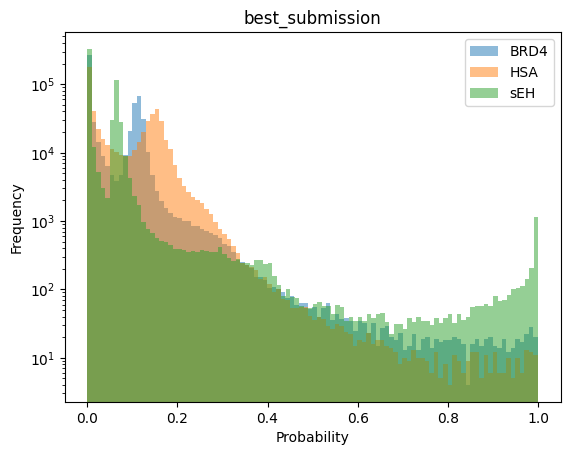

In [68]:
# Plot histogram of binding affinity to frequency for each submission and split on protein name
for submission_name in SUBMISSIONS.keys():
    plt.figure()
    plt.hist(test_data[test_data['protein_name'] == "BRD4"][submission_name + '_binds'], alpha=0.5, bins=100, label='BRD4')
    plt.hist(test_data[test_data['protein_name'] == "HSA"][submission_name + '_binds'], alpha=0.5, bins=100, label='HSA')
    plt.hist(test_data[test_data['protein_name'] == "sEH"][submission_name + '_binds'], alpha=0.5, bins=100, label='sEH')
    plt.yscale('log')
    plt.title(submission_name)
    plt.legend(loc="upper right")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()